## Implementation of SVR - Support Vector Regressor for a Regression problem statement using Admission Prediction dataset

In [1]:
# Importing necessry libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


## EDA

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
## Checking missing values

dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
## Checking the spell check and white spaces of the column

dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
## Removing the white spaces in column name

dataset.columns = dataset.columns.str.strip()
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

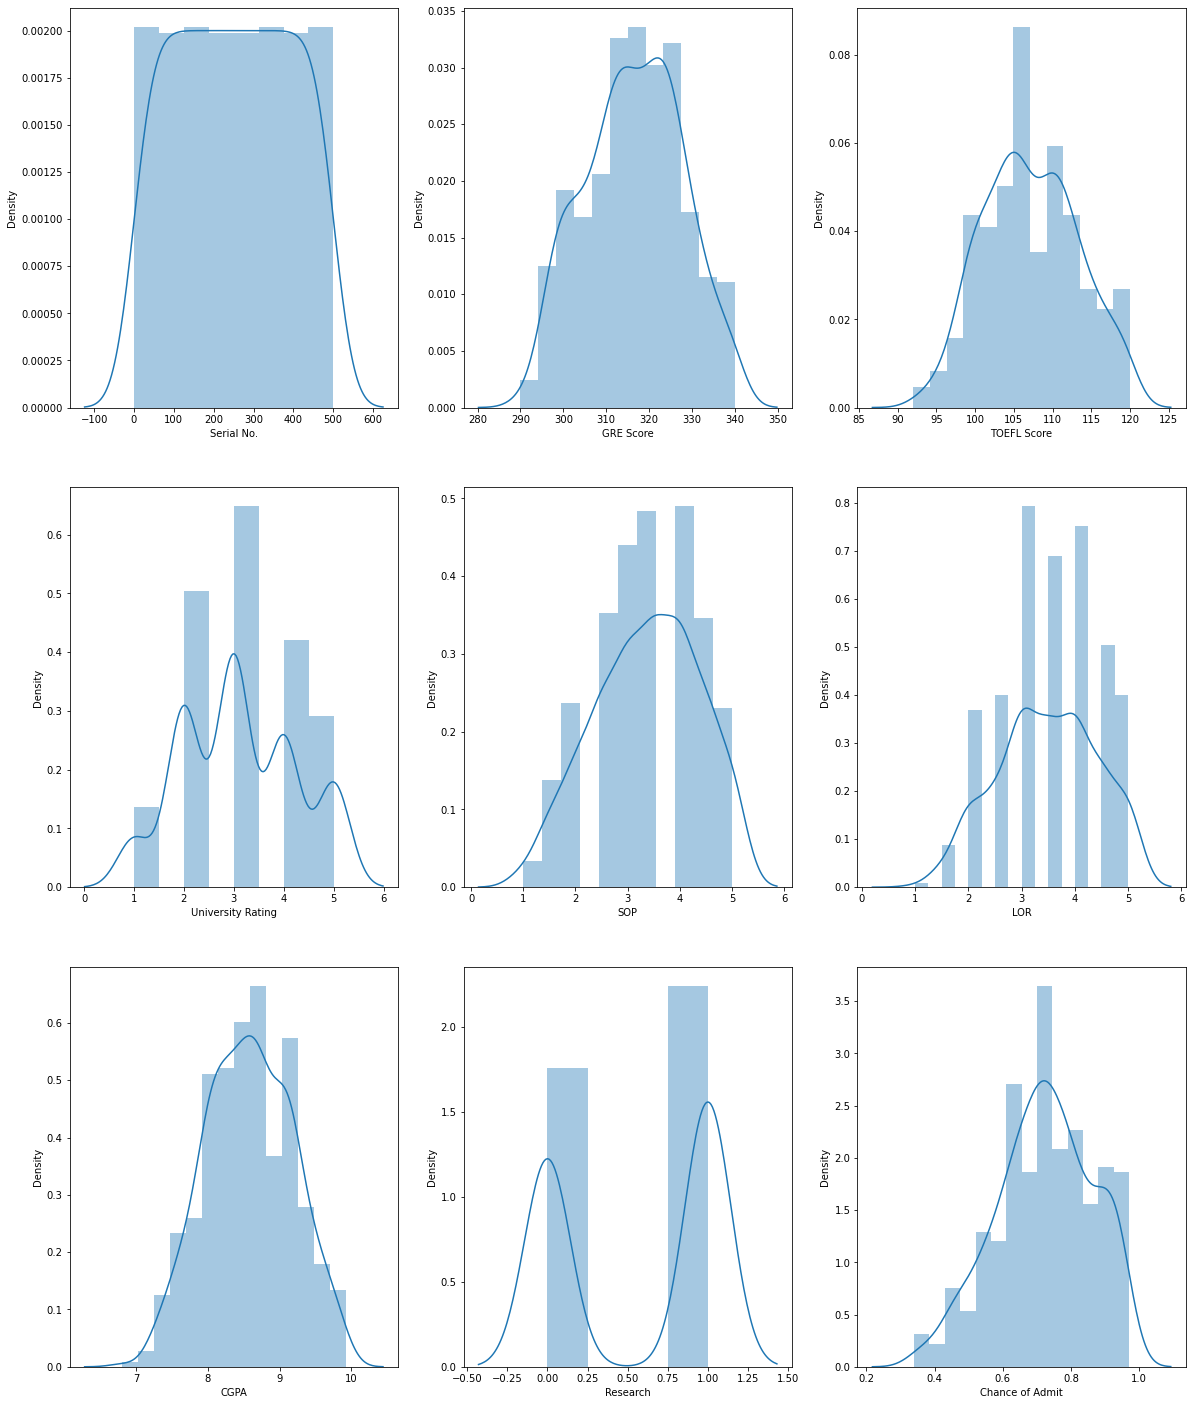

In [11]:
## ## Visualizing the distribution of all columns together using for loop of columns through distribution plot 

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for i in dataset:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dataset[i])
        plt.xlabel(i)
    plotnumber = plotnumber+1
plt.show()

<AxesSubplot:>

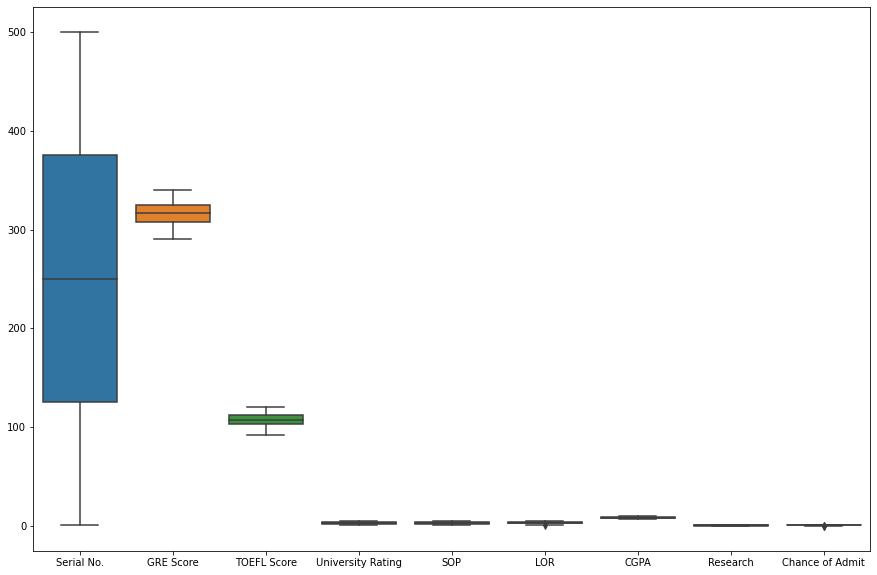

In [12]:
## Finding outliers using Box plot (subplot to display all columns together in single plot)

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dataset,ax=ax)


In [13]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


#### There are no outliers in the dataset

In [14]:
# checking correlation

dataset.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

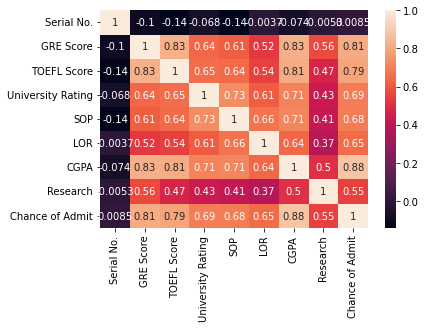

In [16]:
## Finding the correlation between the features

sns.heatmap(dataset.corr(),annot = True)

In [17]:
## Independent and Dependent features

X = dataset[['GRE Score', 'TOEFL Score', 'University Rating','SOP', 'LOR','CGPA','Research']]
y = dataset['Chance of Admit']

In [19]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [20]:
## Spliting training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Feature Engineering

In [22]:
## Standardize the dataset (Feature scaling)

from sklearn.preprocessing import StandardScaler

# Standard Scaler - it centralize the data where Mean=0 and Std Dev = 1 from where distribution happens

## create object
scaler = StandardScaler()
scaler

StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-5.25174731e-01, -7.06985745e-01, -8.28848674e-02, ...,
         5.38819022e-01, -8.35765678e-01, -1.14470294e+00],
       [ 4.77035981e-01,  2.76433873e-01,  1.65251704e+00, ...,
        -1.61323061e-03,  3.63045482e-01, -1.14470294e+00],
       [-7.98504925e-01, -1.03479228e+00, -9.50585823e-01, ...,
         5.38819022e-01, -1.15657430e+00, -1.14470294e+00],
       ...,
       [-1.34516531e+00, -1.36259882e+00, -1.81828678e+00, ...,
        -1.62290999e+00, -2.25407747e+00, -1.14470294e+00],
       [-7.07394861e-01, -3.79179206e-01, -9.50585823e-01, ...,
         5.38819022e-01, -1.52803691e+00, -1.14470294e+00],
       [-2.51844537e-01, -2.15275936e-01, -9.50585823e-01, ...,
        -1.61323061e-03, -5.65611050e-01, -1.14470294e+00]])

In [24]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.57035676e+00,  1.42375676e+00,  7.84816088e-01, ...,
        -1.61323061e-03,  1.61251063e+00,  8.73589088e-01],
       [-2.51844537e-01,  1.12530603e-01,  7.84816088e-01, ...,
         5.38819022e-01,  7.68277423e-01,  8.73589088e-01],
       [-1.60734472e-01, -3.79179206e-01, -9.50585823e-01, ...,
        -1.08247774e+00, -1.57869090e+00, -1.14470294e+00],
       ...,
       [-6.96244077e-02, -7.06985745e-01, -9.50585823e-01, ...,
         1.07925128e+00,  2.61737496e-01, -1.14470294e+00],
       [-6.16284796e-01, -1.36259882e+00, -9.50585823e-01, ...,
        -1.62290999e+00, -2.16965415e+00, -1.14470294e+00],
       [ 2.14856571e-02, -2.15275936e-01, -1.81828678e+00, ...,
        -1.61323061e-03, -1.57869090e+00,  8.73589088e-01]])

## Model Training

In [26]:
## create object

from sklearn.svm import SVR
SVM_Regressor = SVR()
SVM_Regressor

SVR()

In [27]:
## Train the training data with SVM regression

SVM_Regressor.fit(X_train,y_train)

SVR()

In [28]:
## Finding the accuracy of training data

SVM_Regressor.score(X_train,y_train)

0.7757519357301842

In [29]:
## Prediction for the test data

y_pred_SVR = SVM_Regressor.predict(X_test)
y_pred_SVR

array([0.86758693, 0.78401064, 0.58098697, 0.70575523, 0.79341922,
       0.84684761, 0.50224061, 0.68176766, 0.7890468 , 0.75740703,
       0.65423979, 0.70427289, 0.65291603, 0.87242604, 0.81192102,
       0.46349708, 0.78825361, 0.59120035, 0.49104457, 0.60340786,
       0.65592674, 0.61635369, 0.6936474 , 0.70124134, 0.72962268,
       0.58562002, 0.87484478, 0.83448662, 0.62548557, 0.72594558,
       0.55523603, 0.71151451, 0.57128054, 0.84876902, 0.62839779,
       0.68891659, 0.50715952, 0.88026673, 0.63306979, 0.68165443,
       0.86381144, 0.56125806, 0.63224004, 0.8569825 , 0.84865294,
       0.55755756, 0.89763628, 0.80955106, 0.73115395, 0.87475322,
       0.83025309, 0.52673652, 0.7129972 , 0.5005013 , 0.88352502,
       0.59844805, 0.85569749, 0.70625272, 0.68184095, 0.4847354 ,
       0.63242747, 0.65850305, 0.57102219, 0.6063961 , 0.45817298,
       0.57186897, 0.86583523, 0.85248887, 0.6354494 , 0.66025349,
       0.61181011, 0.72180601, 0.66233978, 0.56776826, 0.50365

## Cost Function

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,y_pred_SVR))
print(mean_absolute_error(y_test,y_pred_SVR))
print(np.sqrt(mean_squared_error(y_test,y_pred_SVR)))

0.004940947816722297
0.057582184061892104
0.0702918758941764


## Performance metrics

In [32]:
# Calculating R square

from sklearn.metrics import r2_score
R_square_score = r2_score(y_test,y_pred_SVR)
R_square_score

0.7601877598637248

In [33]:
# Calculating Adjusted R square by using math formula

Adj_R_square = 1 - (1-R_square_score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1 )
Adj_R_square

# NOTES -  Adj R square will always be less than R square.

0.7494954943799418

## Assumptions

Text(0, 0.5, 'Test-predicted data')

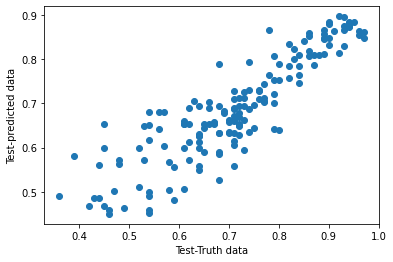

In [35]:
## Assumption 1 - Comparing the predicted output data(reg_pred-predicted point) with the actual test data in the dataset(y_test-truth point)
plt.scatter(y_test,y_pred_SVR)
plt.xlabel('Test-Truth data')
plt.ylabel('Test-predicted data')
# Assumption1 - if we get the output graph in linear, which means Model is good .

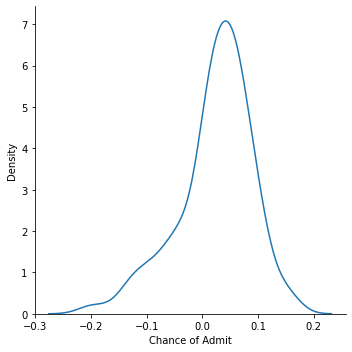

In [36]:
## Assumption 2 - Calculating Residuals/Error - difference between predicted data and actual data

residuals = y_test-y_pred_SVR
residuals
sns.displot(residuals,kind='kde')

Text(0, 0.5, 'Residuals/Error')

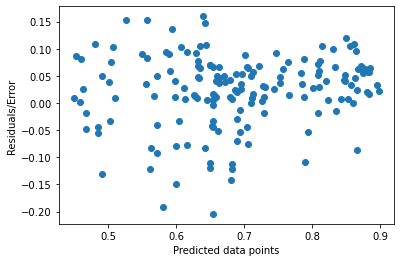

In [37]:
## Assumption 3 - Scatter plot with Residual and predicted points(reg_pred)
## Uniform distribution


plt.scatter(y_pred_SVR,residuals)
plt.xlabel('Predicted data points')
plt.ylabel('Residuals/Error')

# the graph shows it is just randomly distributed(no specific shape) - This is called UNIFORM DISTRIBUTION

## Assumption3 - The Scatter plot between predicted points and residuals should have Uniform Distribution